In [4]:
from keras.utils import np_utils
import pandas as pd
import numpy as np
np.random.seed(10)

In [22]:
from keras.datasets import mnist

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()


In [23]:
print(len(x_train_image))
print(len(x_test_image))

60000
10000


In [24]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap="binary")
    plt.show()

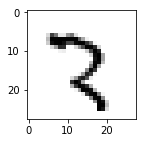

In [25]:
plot_image(x_train_image[500])

In [26]:
y_train_image[500]

3

In [61]:
import matplotlib.pyplot as plt
def plot_images_labels_predition(images, labels, prediction, index, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[index], cmap="binary")
        title = "label = " + str(labels[index])
        if len(prediction) > 0:
            title += " predict = " + str(prediction[index])
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

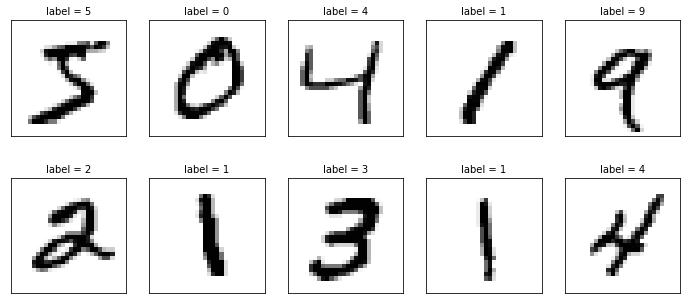

In [30]:
plot_images_labels_predition(x_train_image, y_train_label, [], 0, 10)

In [31]:
# reshape images

print("x_train_image:", x_train_image.shape)
print("x_train_image:", y_train_label.shape)

x_train_image: (60000, 28, 28)
x_train_image: (60000,)


In [36]:
x_Train = x_train_image.reshape(60000, 784).astype("float32")
x_Test = x_test_image.reshape(10000, 784).astype("float32")

In [37]:
print("x_Train:", x_Train.shape)
print("x_Test:", x_Test.shape)

x_Train: (60000, 784)
x_Test: (10000, 784)


In [39]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [41]:
# turn labels to one_hot encoding

print(y_train_label[:5])

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [49]:
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [44]:
# build model

from keras.models import Sequential
from keras.layers import Dense

In [78]:
model = Sequential()
model.add(Dense(units=256,
                input_dim=784, 
                kernel_initializer="normal", 
                activation="relu"))

model.add(Dense(units=10,
                kernel_initializer="normal", 
                activation="softmax"))

In [79]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
# training model

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=x_Train_normalize, 
                          y=y_Train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=200, verbose=2)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4410 - acc: 0.8811 - val_loss: 0.2222 - val_acc: 0.9397
Epoch 2/10
 - 1s - loss: 0.1935 - acc: 0.9449 - val_loss: 0.1613 - val_acc: 0.9568
Epoch 3/10
 - 1s - loss: 0.1363 - acc: 0.9608 - val_loss: 0.1326 - val_acc: 0.9613
Epoch 4/10
 - 1s - loss: 0.1042 - acc: 0.9713 - val_loss: 0.1089 - val_acc: 0.9674
Epoch 5/10
 - 1s - loss: 0.0817 - acc: 0.9763 - val_loss: 0.1010 - val_acc: 0.9713
Epoch 6/10
 - 1s - loss: 0.0654 - acc: 0.9818 - val_loss: 0.0889 - val_acc: 0.9728
Epoch 7/10
 - 1s - loss: 0.0548 - acc: 0.9848 - val_loss: 0.0865 - val_acc: 0.9744
Epoch 8/10
 - 1s - loss: 0.0450 - acc: 0.9874 - val_loss: 0.0848 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0369 - acc: 0.9902 - val_loss: 0.0813 - val_acc: 0.9751
Epoch 10/10
 - 1s - loss: 0.0311 - acc: 0.9924 - val_loss: 0.0794 - val_acc: 0.9765


In [81]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

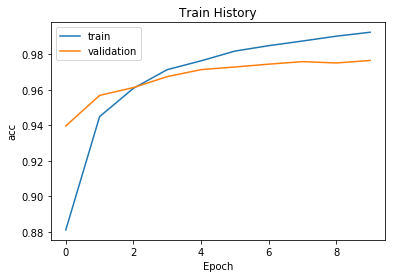

In [82]:
show_train_history(train_history, "acc", "val_acc")

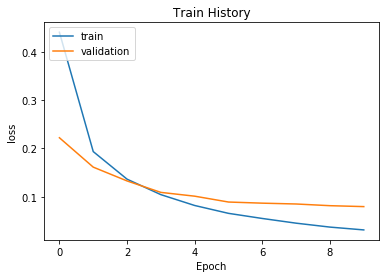

In [83]:
show_train_history(train_history, "loss", "val_loss")

In [57]:
# test model
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print("accuracy = ", scores[1])

10000/10000 [==============================] - 0s 22us/step
accuracy =  0.9793


In [59]:
# predict

prediction = model.predict_classes(x_Test_normalize)
prediction

10000/10000 [==============================] - 0s 18us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

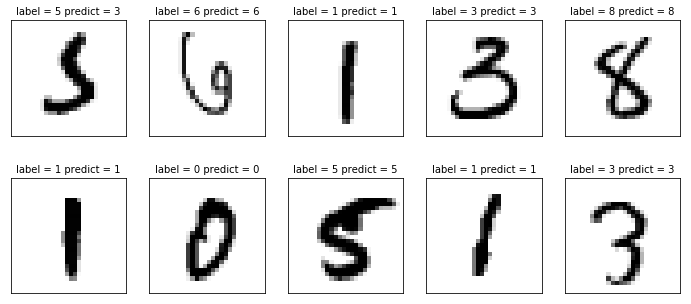

In [62]:
plot_images_labels_predition(x_test_image, y_test_label, prediction, index=340)

In [63]:
# confusion matrix

import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,3,1,1,0,2,1,2,1
1,0,1125,4,0,0,1,2,0,3,0
2,1,1,1018,2,1,0,2,4,3,0
3,0,0,6,993,0,4,0,3,2,2
4,1,0,3,1,960,0,4,2,1,10
5,2,0,0,7,2,869,6,2,2,2
6,4,2,1,1,4,4,941,0,1,0
7,1,3,10,5,1,0,0,1001,0,7
8,5,0,6,12,4,2,3,3,937,2


In [65]:
df = pd.DataFrame({"label": y_test_label, "predict": prediction})
df[:3]

,label,predict
0,7,7
1,2,2
2,1,1


In [66]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
5937,5,3
5972,5,3
8502,5,3


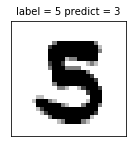

In [67]:
plot_images_labels_predition(x_test_image, y_test_label, prediction, index=1003, num=1)

In [68]:
# change hidden layer to 1000 unit

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units=1000,
                input_dim=784, 
                kernel_initializer="normal", 
                activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(units=10,
                kernel_initializer="normal", 
                activation="softmax"))

In [70]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=x_Train_normalize, 
                          y=y_Train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3595 - acc: 0.8927 - val_loss: 0.1548 - val_acc: 0.9574
Epoch 2/10
 - 5s - loss: 0.1567 - acc: 0.9543 - val_loss: 0.1163 - val_acc: 0.9664
Epoch 3/10
 - 4s - loss: 0.1170 - acc: 0.9652 - val_loss: 0.0984 - val_acc: 0.9709
Epoch 4/10
 - 4s - loss: 0.0900 - acc: 0.9732 - val_loss: 0.0865 - val_acc: 0.9751
Epoch 5/10
 - 4s - loss: 0.0740 - acc: 0.9782 - val_loss: 0.0793 - val_acc: 0.9768
Epoch 6/10
 - 5s - loss: 0.0658 - acc: 0.9798 - val_loss: 0.0717 - val_acc: 0.9773
Epoch 7/10
 - 5s - loss: 0.0541 - acc: 0.9840 - val_loss: 0.0710 - val_acc: 0.9782
Epoch 8/10
 - 5s - loss: 0.0476 - acc: 0.9853 - val_loss: 0.0684 - val_acc: 0.9792
Epoch 9/10
 - 5s - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0692 - val_acc: 0.9784
Epoch 10/10
 - 4s - loss: 0.0388 - acc: 0.9878 - val_loss: 0.0659 - val_acc: 0.9808


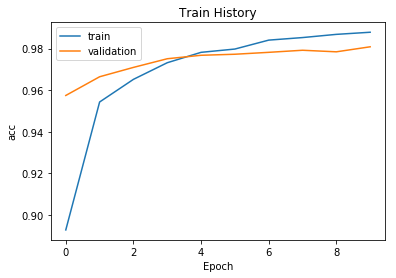

In [74]:
show_train_history(train_history, "acc", "val_acc")

In [84]:
# build muti-layers model

model = Sequential()
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer="normal", 
                activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(units=1000,
                kernel_initializer="normal", 
                activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(units=10,
                kernel_initializer="normal", 
                activation="softmax"))

In [85]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=x_Train_normalize, 
                          y=y_Train_OneHot, validation_split=0.2, 
                          epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.3734 - acc: 0.8833 - val_loss: 0.1359 - val_acc: 0.9583
Epoch 2/10
 - 11s - loss: 0.1642 - acc: 0.9491 - val_loss: 0.1049 - val_acc: 0.9690
Epoch 3/10
 - 11s - loss: 0.1246 - acc: 0.9610 - val_loss: 0.0890 - val_acc: 0.9728
Epoch 4/10
 - 11s - loss: 0.1017 - acc: 0.9685 - val_loss: 0.0830 - val_acc: 0.9740
Epoch 5/10
 - 10s - loss: 0.0846 - acc: 0.9723 - val_loss: 0.0808 - val_acc: 0.9740
Epoch 6/10
 - 11s - loss: 0.0751 - acc: 0.9763 - val_loss: 0.0794 - val_acc: 0.9755
Epoch 7/10
 - 11s - loss: 0.0688 - acc: 0.9778 - val_loss: 0.0741 - val_acc: 0.9784
Epoch 8/10
 - 11s - loss: 0.0636 - acc: 0.9798 - val_loss: 0.0745 - val_acc: 0.9787
Epoch 9/10
 - 11s - loss: 0.0556 - acc: 0.9816 - val_loss: 0.0786 - val_acc: 0.9782
Epoch 10/10
 - 11s - loss: 0.0540 - acc: 0.9821 - val_loss: 0.0739 - val_acc: 0.9786


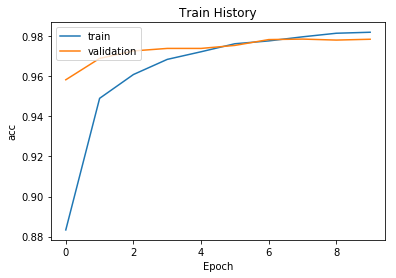

In [87]:
show_train_history(train_history, "acc", "val_acc")

In [88]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print("accuracy = ", scores[1])

10000/10000 [==============================] - 1s 99us/step
accuracy =  0.9803
